In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [5]:
import os
import cv2
import numpy as np
from keras.models import model_from_json
from keras.preprocessing import image
from google.colab.patches import cv2_imshow

In [6]:
#load model
model = model_from_json(open("gdrive/My Drive/Colab Notebooks/Emotions.json", "r").read())
#load weights
model.load_weights('gdrive/My Drive/Colab Notebooks/Emotions.h5')

In [7]:
face_haar_cascade = cv2.CascadeClassifier('gdrive/My Drive/Colab Notebooks/haarcascade_frontalface_default.xml')

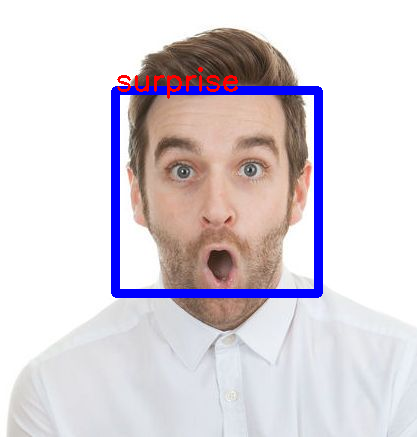

In [27]:
#image = cv2.imread('gdrive/My Drive/Colab Notebooks/IMG_1',cv2.IMREAD_UNCHANGED)
#cv2_imshow(image)

img = cv2.imread('gdrive/My Drive/Colab Notebooks/IMG_6.jpg')
#cv2_imshow(img)
gray_img= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#cv2_imshow(gray_img)

faces_detected = face_haar_cascade.detectMultiScale(gray_img, 1.32, 5)

for (x,y,w,h) in faces_detected:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),thickness=7)
        roi_gray=gray_img[y:y+w,x:x+h]#cropping region of interest i.e. face area from  image
        roi_gray=cv2.resize(roi_gray,(48,48))
        img_pixels = image.img_to_array(roi_gray)
        img_pixels = np.expand_dims(img_pixels, axis = 0)
        img_pixels /= 255

        predictions = model.predict(img_pixels)

        #find max indexed array
        max_index = np.argmax(predictions[0])

        emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
        predicted_emotion = emotions[max_index] 

        cv2.putText(img, predicted_emotion, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)       

predicted_emotion        
cv2_imshow(img)    